In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
import h5py
import tabulate
import pickle
import awkward as ak

In [2]:
sys.path.append('/project/rpp-blairt2k/elrick/WatChMaL')
from watchmal.dataset.h5_dataset import H5Dataset

In [24]:
# Data paths
data_path_NB = "/project/rpp-blairt2k/gilrdzp/outputs_truth_h5_combined/mdt_iwcd_p320ka_w750m_1e17pot_2p39_wcsim_digihit.h5"
data_path_PG = "/project/rpp-blairt2k/machine_learning/data/IWCD_mPMT_Short/IWCD_mPMT_Short_emgp0_E0to1000MeV_digihits.h5"

# Particle Gun indx
electron_idx_pg_path = "/project/rpp-blairt2k/machine_learning/data/IWCD_mPMT_Short/index_lists/1class_regression/IWCD_mPMT_Short_electrons_FC.npz"
muon_idx_pg_path = "/project/rpp-blairt2k/machine_learning/data/IWCD_mPMT_Short/index_lists/1class_regression/IWCD_mPMT_Short_muons_FC.npz"

# Neut All
Neut_reco_path = "/project/rpp-blairt2k/gilrdzp/RecoAnalysis_NBS.npz"

# Files to exclude
files2exclude_path  = "/project/rpp-blairt2k/elrick/Notebooks/files_to_exclude.npy"

# mpmt Positions file
mpmt_positions_file='/project/rpp-blairt2k/gilrdzp/IWCDshort_mPMT_image_positions.npz'

In [4]:
with np.load(electron_idx_pg_path, allow_pickle=True) as data_electron_PG:
    idxs_electron_PG = data_electron_PG['test_idxs']

with np.load(muon_idx_pg_path, allow_pickle=True) as data_muon_PG:
    idxs_muon_PG = data_muon_PG['test_idxs']

In [5]:
dataPG = H5Dataset(data_path_PG)
dataNB = H5Dataset(data_path_NB)

In [6]:
mean_HT_e = []
mean_HT_mu = []

In [7]:
for i in idxs_electron_PG:
    data[i]
    HTmean = np.mean(data.event_hit_times)
    mean_HT_e.append(HTmean)

In [16]:
for i in idxs_muon_PG:
    data[i]
    HTmean = np.mean(data.event_hit_times)
    mean_HT_mu.append(HTmean)

In [ ]:
for i in idxs_muon_PG:
    data[i]
    HTmean = np.mean(data.event_hit_times)
    mean_HT_mu.append(HTmean)

In [26]:
dataNB.initialize()
idxs_muon_PG = np.where(dataNB.labels == 2)[0]

mean_HT_e_NB = []
mean_HT_mu_NB = []

In [27]:
for i in idxs_muon_PG:
    dataNB[i]
    HTmean = np.mean(dataNB.event_hit_times)
    mean_HT_mu_NB.append(HTmean)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


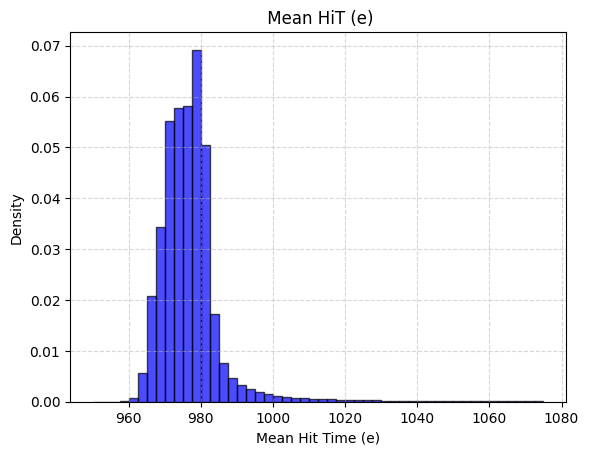

In [15]:
plt.hist(mean_HT_e, bins=50, density=True, range=(950, 1075), alpha=0.7, color="blue", edgecolor="black")  
plt.xlabel("Mean Hit Time (e)")  
plt.ylabel("Density")  
plt.title(" Mean HiT (e)")  
plt.grid(True, linestyle="--", alpha=0.5)  # Add a light grid
plt.show()

ValueError: autodetected range of [nan, nan] is not finite

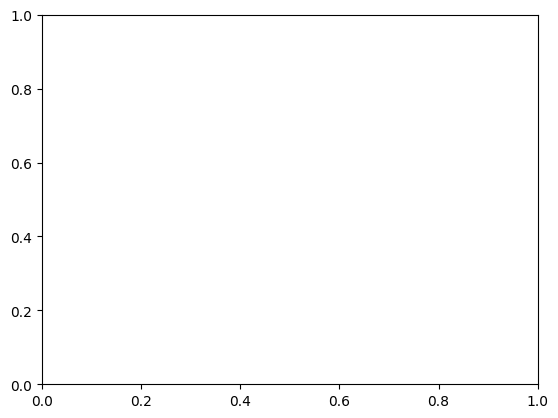

In [29]:
plt.hist2d(dataNB.angles[idxs_muon_PG,1],mean_HT_mu_NB, bins = 60)
plt.show()

In [20]:
np.size(data.angles)

46963098